In [182]:


EPOCHS = 100
IMG_SIZE = 224
BATCH_SIZE = 32


In [183]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import shutil
from shutil import copyfile
from tqdm import tqdm

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.applications import EfficientNetV2M
from tensorflow.keras.applications import EfficientNetV2L
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG19



In [184]:
df=pd.read_csv(r'archive/ISIC_2019_Training_GroundTruth.csv')
print (df.head())
print (len(df))
print (df.columns)

 
label_names = ['MAL', 'BNN']

label_names = sorted(label_names)
# print(label_names)

df['image']=df['image'].apply(lambda x: x+ '.jpg')


# print (df.head())

          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
25331
Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')


In [185]:
# Define root directory
data_dir = 'abc'

# Empty directory to prevent FileExistsError if the function is run several times
if os.path.exists(data_dir):
  shutil.rmtree(data_dir)

# Create the empty dir for each skin lesion
for label in label_names:
    os.makedirs(os.path.join(data_dir, label)) # e.g. /kaggle/working/lesions/MEL

In [186]:
# Iterate over dataframe and move images to correct folders
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc=f'Copying HAM10000 dataset images..'):
    # Get the image pathname
    hot_label = row[row == 1].index.tolist()[0]
    image_name = row['image']
    a = ['MEL', 'BCC', 'AKIEC', 'VASC']
    if hot_label == 'NV':
        pass
    elif hot_label in a:
        hot_label = 'MAL'
        src_path = os.path.join("archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/", image_name)
        dst_path = os.path.join(data_dir, hot_label, image_name)
        copyfile(src_path, dst_path)
    else:
        hot_label = 'BNN'
        src_path = os.path.join("archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/", image_name)
        dst_path = os.path.join(data_dir, hot_label, image_name)
        copyfile(src_path, dst_path)
        


Copying HAM10000 dataset images..: 100%|██████████| 25331/25331 [00:13<00:00, 1827.91it/s]


In [187]:
tot = 0
for label in label_names:
    cnt_label = len(os.listdir(os.path.join(data_dir, label)))
    print(f"There are {cnt_label} images with label {label}.")
    tot += cnt_label
print(f"\nThere are {tot} total images across all labels.")

There are 4358 images with label BNN.
There are 8098 images with label MAL.

There are 12456 total images across all labels.


In [188]:
df_isic=pd.read_csv(r'archive/ISIC_2019_Training_GroundTruth.csv')
print (df_isic.columns)
# Add .jpg extension to the image filenames
df_isic['image']=df_isic['image'].apply(lambda x: x+ '.jpg')
x = df_isic.head()
print (df_isic.columns[1:])
# label_names = 

Index(['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')
Index(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], dtype='object')


In [189]:
# Iterate over dataframe and move images to correct folders
for index, row in tqdm(df_isic.iterrows(), total=df_isic.shape[0], desc=f'Copying ISIC 2019 dataset images..'):
    # Get the image pathname
    hot_label = row[row == 1].index.tolist()[0]
    image_name = row['image']
    a = ['MEL', 'BCC', 'AKIEC', 'VASC','AK','SCC']
    if hot_label == 'NV' or hot_label == 'UNK':
        pass
    elif hot_label in a:
        hot_label = 'MAL'
        src_path = os.path.join("archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/", image_name)
        dst_path = os.path.join(data_dir, hot_label, image_name)
        copyfile(src_path, dst_path)
    else:
        hot_label = 'BNN'
        src_path = os.path.join("archive/ISIC_2019_Training_Input/ISIC_2019_Training_Input/", image_name)
        dst_path = os.path.join(data_dir, hot_label, image_name)
        copyfile(src_path, dst_path)

Copying ISIC 2019 dataset images..: 100%|██████████| 25331/25331 [00:17<00:00, 1422.15it/s]


In [190]:


tot = 0
for label in label_names:
    cnt_label = len(os.listdir(os.path.join(data_dir, label)))
    print(f"There are {cnt_label} images with label {label}.")
    tot += cnt_label
print(f"\nThere are {tot} total images across all labels.")



There are 4358 images with label BNN.
There are 9593 images with label MAL.

There are 13951 total images across all labels.


In [191]:
# Not using Benign images from this dataset due to the chance of making the final model biased
# Iterate over the new dataset and copy only the Benign images
benign_paths = [
                "123/test/Benign/",
                "123/train/Benign/",
                ]

for directory_path in benign_paths:

    files_and_directories = os.listdir(directory_path)


    only_files = [f for f in files_and_directories if os.path.isfile(os.path.join(directory_path, f))]
    for image_name in tqdm(only_files, desc=f'Copying Melanoma-Cancer dataset benign images..'):

        # Copy the image to the right label directory
        src_path = os.path.join(directory_path, image_name)
        dst_path = os.path.join(data_dir, 'BNN', image_name)
        copyfile(src_path, dst_path)

Copying Melanoma-Cancer dataset benign images..: 100%|██████████| 6289/6289 [00:00<00:00, 6485.50it/s]


In [192]:
# Iterate over the new dataset and copy only the Malignant Images images
malignant_paths = [
                  "123/test/Malignant",
                  "123/train/Malignant"
                   ]

for directory_path in malignant_paths:

    files_and_directories = os.listdir(directory_path)


    only_files = [f for f in files_and_directories if os.path.isfile(os.path.join(directory_path, f))]
    for image_name in tqdm(only_files, desc=f'Copying Melanoma-Cancer dataset Malignant images..'):

        # Copy the image to the right label directory
        src_path = os.path.join(directory_path, image_name)
        dst_path = os.path.join(data_dir, 'MAL', image_name)
        copyfile(src_path, dst_path)

Copying Melanoma-Cancer dataset Malignant images..: 100%|██████████| 1000/1000 [00:00<00:00, 6981.91it/s]
Copying Melanoma-Cancer dataset Malignant images..: 100%|██████████| 5590/5590 [00:00<00:00, 6564.43it/s]


In [193]:
tot = 0
for label in label_names:
    cnt_label = len(os.listdir(os.path.join(data_dir, label)))
    print(f"There are {cnt_label} images with label {label}.")
    tot += cnt_label
print(f"\nThere are {tot} total images across all labels.")

There are 11647 images with label BNN.
There are 16183 images with label MAL.

There are 27830 total images across all labels.


In [194]:
import os
import shutil
import pandas as pd
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def make_dataframe(sdir):
    filepaths = []
    labels = []
    classlist = sorted(os.listdir(sdir))
    
    for klass in classlist:
        classpath = os.path.join(sdir, klass)
        if os.path.isdir(classpath):
            flist = sorted(os.listdir(classpath))
            desc = f'{klass:25s}'
            for f in tqdm(flist, ncols=130, desc=desc, unit='files', colour='blue'):
                fpath = os.path.join(classpath, f)
                if os.path.isfile(fpath):  # Ensure the path points to a file
                    filepaths.append(fpath)
                    labels.append(klass)
    
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)
    
    # Verify file paths
    df['valid_paths'] = df['filepaths'].apply(os.path.exists)
    df = df[df['valid_paths']]  # Keep only rows with valid file paths
    df.drop(columns=['valid_paths'], inplace=True)
    
    return df

def make_and_store_images(df, augdir, n, img_size, color_mode='rgb', save_prefix='aug-', save_format='jpg'):
    df = df.copy()
    
    # Ensure the augmentation directory is clean
    if os.path.isdir(augdir):
        shutil.rmtree(augdir)
    os.mkdir(augdir)
    
    # Create subdirectories for each class
    for label in df['labels'].unique():
        classpath = os.path.join(augdir, label)
        os.mkdir(classpath)
    
    total = 0
    
    # Set up the image data generator
    gen = ImageDataGenerator(
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2
    )
    
    groups = df.groupby('labels')
    
    for label in df['labels'].unique():
        classdir = os.path.join(augdir, label)
        group = groups.get_group(label)  # Get all images for the class
        sample_count = len(group)
        
        if sample_count < n:  # Augment if fewer images than required
            aug_img_count = 0
            delta = n - sample_count  # Number of images to generate
            
            msg = f'{label:30s} - Creating {delta:5d} augmented images'
            print(msg)
            
            # Flow from DataFrame for augmentation
            aug_gen = gen.flow_from_dataframe(
                group,
                x_col='filepaths',
                y_col=None,
                target_size=img_size,
                class_mode=None,
                batch_size=1,
                shuffle=False,
                save_to_dir=classdir,
                save_prefix=save_prefix,
                color_mode=color_mode,
                save_format=save_format
            )
            
            while aug_img_count < delta:
                images = next(aug_gen)
                aug_img_count += len(images)
            
            total += aug_img_count
    
    print('Total Augmented images created:', total)

# Example usage
sdir = "abc"  # Replace with the path to your source directory
df = make_dataframe(sdir)
print(df.head())
print('Length of dataframe:', len(df))

augdir = "augmented_images"  # Directory for storing augmented images
n = 16000  # Target number of images per class
IMG_SIZE = 224  # Example image size
img_size = (IMG_SIZE, IMG_SIZE)

make_and_store_images(df, augdir, n, img_size, color_mode='rgb', save_prefix='aug-', save_format='jpg')


MAL                      : 100%|█████████████████████████████████████████████████████| 16183/16183 [00:00<00:00, 576582.30files/s]


          filepaths labels
0     abc/BNN/1.jpg    BNN
1    abc/BNN/10.jpg    BNN
2   abc/BNN/100.jpg    BNN
3  abc/BNN/1000.jpg    BNN
4  abc/BNN/1001.jpg    BNN
Length of dataframe: 27830
BNN                            - Creating  4353 augmented images
Found 11647 validated image filenames.
Total Augmented images created: 4353


In [195]:
import os
from tqdm import tqdm
import shutil

# Define the base directory
data_dir = "abcd/"

# Function to copy files from one directory to another
def copy_images(src_dir, dst_base_dir, folder_name):
    # Create the destination directory if it doesn't exist
    dst_dir = os.path.join(dst_base_dir, folder_name)
    os.makedirs(dst_dir, exist_ok=True)
    
    # Get all files in the source directory
    files_and_directories = os.listdir(src_dir)
    only_files = [f for f in files_and_directories if os.path.isfile(os.path.join(src_dir, f))]
    
    # Copy each file from the source to the destination
    for image_name in tqdm(only_files, desc=f'Copying Augmented {folder_name} images..'):
        src_path = os.path.join(src_dir, image_name)
        dst_path = os.path.join(dst_dir, image_name)
        shutil.copy(src_path, dst_path)

# Define source paths for each folder
aug_path1 = "abc/BNN"
aug_path2 = "abc/MAL"

# Call the function for both BNN and MAL folders
copy_images(aug_path1, data_dir, 'BNN')
copy_images(aug_path2, data_dir, 'MAL')


Copying Augmented MAL images..: 100%|██████████| 16183/16183 [00:11<00:00, 1457.20it/s]


In [196]:
tot = 0
for label in label_names:
    cnt_label = len(os.listdir(os.path.join(data_dir, label)))
    print(f"There are {cnt_label} images with label {label}.")
    tot += cnt_label
print(f"\nThere are {tot} total images across all labels.")

There are 11647 images with label BNN.
There are 16183 images with label MAL.

There are 27830 total images across all labels.


In [197]:
# Start weights at zero
num_classes = len(label_names)
weights = [0] * num_classes  # e.g. [0, 0, 0, .. 0]

tot = 0
for idx, label in enumerate(label_names):
    cnt_label = len(os.listdir(os.path.join(data_dir, label)))
    weights[idx] = cnt_label  # really a count right now
    tot += cnt_label

class_frequencies = weights
class_frequencies = [ w / tot for w in weights ]  # [0.018897364771151177, 0.0297041 ...

weights = [ 1.0 / cnt for cnt in weights ]
weights = [ tot * w / num_classes for w in weights ]

class_weight = {}
for i in range(num_classes):
    class_weight[i] = weights[i]
    print(f"Weight for class {i}: " + '{:.2f}'.format(weights[i]))

Weight for class 0: 1.19
Weight for class 1: 0.86


In [198]:


# Now that images are in correct disk folder structure, we can create a tf data dataset easily. Can return the Train and val/test datasets all at once.
train_ds, val_and_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=label_names,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=7,
    validation_split=0.2,  # Set aside 20% for val & test
    subset="both",
    crop_to_aspect_ratio=True,
)



Found 27830 files belonging to 2 classes.
Using 22264 files for training.
Using 5566 files for validation.


In [199]:
val_and_test_ds_size = len(list(val_and_test_ds))

val_size = int(val_and_test_ds_size * 0.5)
test_size = val_and_test_ds_size - val_size

val_ds = val_and_test_ds.take(val_size)
test_ds = val_and_test_ds.skip(val_size)

In [200]:
for images_batch, labels_batch in test_ds.take(1):
    print(images_batch.shape)
    print(labels_batch.shape)

(32, 224, 224, 3)
(32, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11.048857..224.0865].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [12.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [5.3367743..175.27545].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.7024593..212.41112].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.7453985..229.69421].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..227.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.4920263..183.20023].
Clipping inp

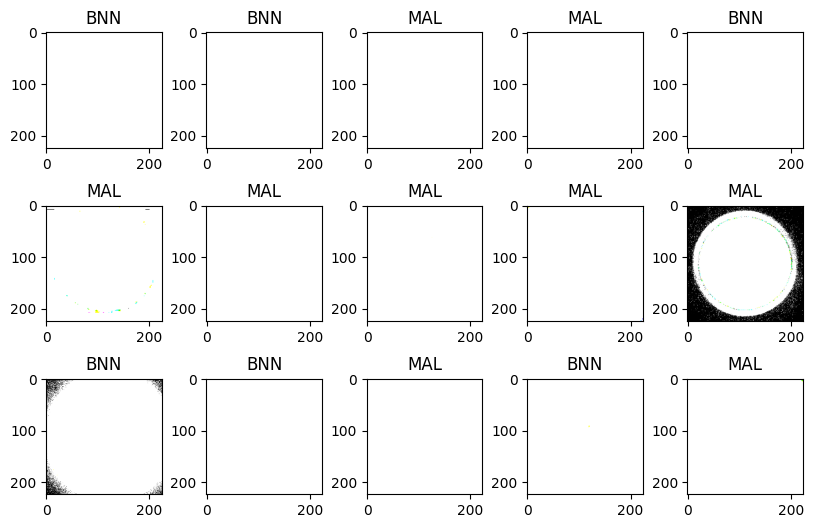

In [201]:
import matplotlib.pyplot as plt

n_rows = 3
n_cols = 5

plt.figure(figsize=(n_cols * 2.0, n_rows * 2.0))

# Get a batch to work with
for images_batch, labels_batch in train_ds.take(1):
    pass

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        # Grab one image and convert it to NumPy type values
        img = images_batch[index, :, :, :].numpy()
        plt.imshow(img) #, cmap="binary", interpolation="nearest")

        # For the labels, we need to turn a length-8 one-hot EagerTensor
        # into the string label
        label_row = labels_batch[index, :]

        # Find the class label number with argmax and convert to NumPy type
        class_label = tf.argmax(label_row).numpy()

        # Look up the list
        class_label = label_names[class_label]

        # Use it on the plot
        plt.title(class_label)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [202]:


image_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.RandomRotation(factor=0.15),
    tf.keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=7),
])



In [203]:
# Cache dataset for performance and prefetch so CPU can do work while GPU training on current batch.  Train is already shuffled earlier.
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [204]:
METRICS = [
    tf.keras.metrics.BinaryCrossentropy(name='binary_crossentropy'),
    # tf.keras.metrics.TruePositives(name='tp'),
    # tf.keras.metrics.TrueNegatives(name='tn'),
    # tf.keras.metrics.FalsePositives(name='fp'),
    # tf.keras.metrics.FalseNegatives(name='fn')
    #tf.keras.metrics.BinaryAccuracy(name='BinaryAccuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.F1Score(name='f1'),
    tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy'),
]

In [205]:
def build_model_EfficientNetB0(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetB0(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [206]:
def build_model_EfficientNetB3(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetB3(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetB3")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [207]:


def build_model_EfficientNetB4(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetB4(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetB4")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model



In [208]:
def build_model_EfficientNetB7(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetB7(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetB7")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [209]:


def build_model_EfficientNetV2B3(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetV2B3(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetV2B3")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model



In [210]:
def build_model_InceptionV3(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = InceptionV3(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
#     x = ops.cast(aug_inputs, "float32")
    x = tf.keras.applications.inception_v3.preprocess_input(model.output)
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="InceptionV3")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [211]:
def build_model_Xception(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    inputs = image_augmentation(inputs)
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    scale_layer = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)

    # Base model
    base_model = Xception(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights="imagenet")

    # Freeze the pretrained weights
    x = scale_layer(inputs)
    x = base_model(x, training = False)
    # Rebuild top like in original paper

    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="Xception")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=metrics)

    return model

In [212]:
def build_model_VGG19(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = VGG19(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
#     x = ops.cast(aug_inputs, "float32")
    x = tf.keras.applications.vgg19.preprocess_input(model.output)
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="VGG19")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [213]:
def build_model_EfficientNetV2M(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetV2M(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetV2M")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model

In [214]:


def build_model_EfficientNetV2L(num_classes, metrics=METRICS, output_bias=None):

    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    # Inputs and augmentation
    inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    aug_inputs = image_augmentation(inputs)

    # Base model
    model = EfficientNetV2L(include_top=False, input_tensor=aug_inputs, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top like in original paper
    x = tf.keras.layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2, name="top_dropout")(x)
    outputs = tf.keras.layers.Dense(num_classes,
                                    activation="softmax",
                                    # bias otherwise defaults to zeros
                                    bias_initializer=output_bias,
                                    name="pred")(x)

    # Compile Model
    model = tf.keras.Model(inputs, outputs, name="EfficientNetV2L")

    # Using a large learning rate for this part since most weights are fixed
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

    model.compile(
        optimizer=optimizer, loss="binary_crossentropy", metrics=metrics,
    )

    return model



In [215]:
model_1 = build_model_EfficientNetB0(num_classes)
model_2 = build_model_EfficientNetB3(num_classes)
# model_3 = build_model_EfficientNetB4(num_classes)
# model_4 = build_model_EfficientNetB7(num_classes)
# model_5 = build_model_EfficientNetV2B3(num_classes)
# model_6 = build_model_EfficientNetV2M(num_classes)
# model_7 = build_model_EfficientNetV2L(num_classes)
# model_8 = build_model_InceptionV3(num_classes)
# model_9 = build_model_VGG19(num_classes)

In [216]:


models = [model_1, model_2]
# model.summary(show_trainable=True)
print("The following models are being trained - ")
for x in models:
    print(f"{x.name}")



The following models are being trained - 
EfficientNet
EfficientNetB3


In [217]:
# build_model_EfficientNetB3# Use early stopping to train as long as possible
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True,
)

# And Reduce LR on Plateau to lower learning rate if stagnating
reduce_lr_on_plateau_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,         # reduce by half (divide by 2)
    patience=5,         # must be lower than patience of early stopping
)

In [218]:
def plot_history(model,history):
    
    # Plot the loss and accuracy curves for training and validation
#     plt.title(model.name)
    fig, ax = plt.subplots(2,1)
    ax[0].set_title(f"{model.name} Loss")
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].set_title(f"\n{model.name} Accuracy")
    ax[1].plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_categorical_accuracy'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    fig.tight_layout()
    
def pred_confusion(model):
   
    true_labels = []
    for _, tmp_labels in test_ds:
        true_labels.append(tmp_labels.numpy())

    true_labels = np.concatenate(true_labels)
    true_labels = np.argmax(true_labels, axis=1)  # (1732,)

    print("Evaluating on test data")
    results = model.evaluate(test_ds, batch_size=BATCH_SIZE)
    
    print("Generating prediction data")

    test_predictions_baseline = model.predict(test_ds, batch_size=BATCH_SIZE)
    predicted_classes = np.argmax(test_predictions_baseline, axis=1)
    print(classification_report(true_labels, predicted_classes, target_names=label_names))


    cm = confusion_matrix(true_labels, predicted_classes)
    cm_display = ConfusionMatrixDisplay(cm,display_labels =label_names).plot()

In [219]:
EPOCHS = 5

In [220]:
history = []
for i in models:
    print(f"Training model {i.name} - ")
    x = i.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=val_ds,
                    class_weight=class_weight,  # use our class weights here
                    callbacks=[early_stopping_cb, reduce_lr_on_plateau_cb],
                    verbose = 2
                   )

    i.save(f'{i.name}_classifier_head.keras')
    history.append(x)
    print(f"{i.name} Training Complete")

Training model EfficientNet - 
Epoch 1/5
696/696 - 76s - 109ms/step - binary_crossentropy: 0.6938 - categorical_accuracy: 0.7081 - f1: 0.7042 - loss: 0.6987 - precision: 0.7081 - recall: 0.7081 - val_binary_crossentropy: 0.7059 - val_categorical_accuracy: 0.6613 - val_f1: 0.6612 - val_loss: 0.7059 - val_precision: 0.6613 - val_recall: 0.6613 - learning_rate: 0.0100
Epoch 2/5
696/696 - 68s - 98ms/step - binary_crossentropy: 0.5722 - categorical_accuracy: 0.7246 - f1: 0.7203 - loss: 0.5753 - precision: 0.7246 - recall: 0.7246 - val_binary_crossentropy: 0.5876 - val_categorical_accuracy: 0.7155 - val_f1: 0.7144 - val_loss: 0.5876 - val_precision: 0.7155 - val_recall: 0.7155 - learning_rate: 0.0100
Epoch 3/5
696/696 - 68s - 98ms/step - binary_crossentropy: 0.5329 - categorical_accuracy: 0.7361 - f1: 0.7314 - loss: 0.5359 - precision: 0.7361 - recall: 0.7361 - val_binary_crossentropy: 0.5191 - val_categorical_accuracy: 0.7349 - val_f1: 0.7313 - val_loss: 0.5191 - val_precision: 0.7349 - val

For model EfficientNet - 
Evaluating on test data
87/87 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - binary_crossentropy: 0.4910 - categorical_accuracy: 0.7468 - f1: 0.7436 - loss: 0.4910 - precision: 0.7468 - recall: 0.7468
Generating prediction data
87/87 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step
              precision    recall  f1-score   support

         BNN       0.67      0.79      0.72      1173
         MAL       0.82      0.72      0.77      1609

    accuracy                           0.75      2782
   macro avg       0.75      0.75      0.74      2782
weighted avg       0.76      0.75      0.75      2782

Model Saved as EfficientNet_classifier_head.keras
__________
For model EfficientNetB3 - 
Evaluating on test data
87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - binary_crossentropy: 0.5157 - categorical_accuracy: 0.7339 - f1: 0.7301 - loss: 0.5157 - precision: 0.7339 - recall: 0.7339
Generating prediction data
87/87 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step
              precision    recall  f1-sc

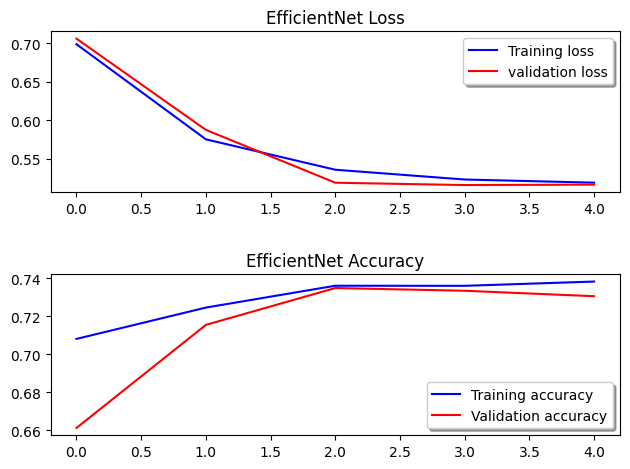

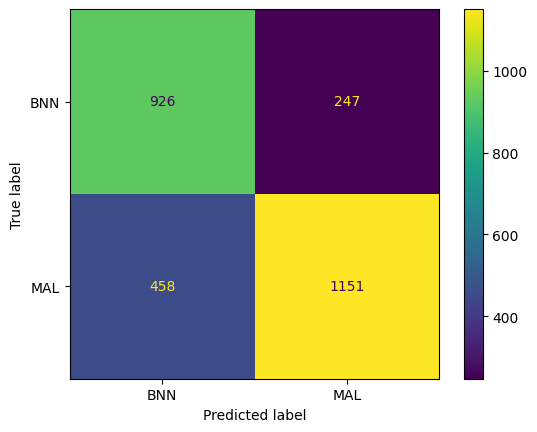

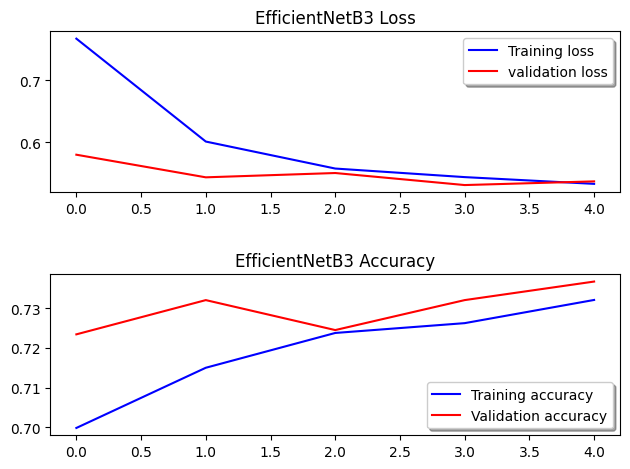

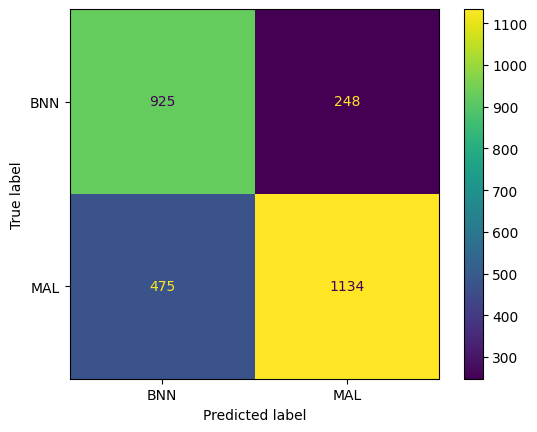

In [221]:


for i,j in zip(models,history):
    print(f"For model {i.name} - ")
    plot_history(i,j)
    pred_confusion(i)
    # i.save(f'{i.name}_classifier_head.keras')
    print(f"Model Saved as {i.name}_classifier_head.keras")
    print("__________")



In [ ]:
for i,j in zip(models,history):


In [222]:
def save_final_model(model, file_name):
    """
    Save the trained model to a specified file.

    Args:
        model: Trained TensorFlow/Keras model.
        file_name (str): File name to save the model (e.g., 'final_model.keras').
    """
    model.save(file_name)
    print(f"Model saved successfully as {file_name}")


In [223]:
# Assuming `model_1` is the trained model
# save_final_model(model_1, "final_model.keras")


In [224]:
from tensorflow.keras.models import load_model
modelp = load_model(models[0])#("EfficientNet_classifier_head.keras")
modelp2 = load_model(models[1])#("EfficientNetB3_classifier_head.keras")


TypeError: stat: path should be string, bytes, os.PathLike or integer, not Functional

In [93]:
print(modelp.name)
print(modelp.summary())

EfficientNet


Model: "EfficientNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ sequential_1[0][… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati

 Total params: 4,067,499 (15.52 MB)

 Trainable params: 5,122 (20.01 KB)

 Non-trainable params: 4,052,131 (15.46 MB)

 Optimizer params: 10,246 (40.03 KB)

None


In [ ]:
from scipy.stats import ttest_ind

# Sample accuracy scores for two models (replace these with your actual data)
model1_accuracies = history[0]['categorical_accuracy']
model2_accuracies = history[1]['categorical_accuracy']

# Perform an independent t-test
t_stat, p_value = ttest_ind(model1_accuracies, model2_accuracies)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: The models have significantly different accuracies.")
else:
    print("Fail to reject the null hypothesis: No significant difference in accuracies.")
